<a href="https://www.kaggle.com/code/ishkag26/project-1-credit-card-fraud-detection?scriptVersionId=142461175" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**CREDIT CARD FRAUD DETECTION -**

> **Credit card fraud is the act of using another person’s credit card to make purchases or request cash advances without the cardholder’s knowledge or consent.**
 
> **Credit card fraud detection is the collective term for the policies, tools, methodologies, and practices that credit card companies and financial institutions take to combat identity fraud and stop fraudulent transactions.**

> **In recent years, as the amount of data has exploded and the number of payment card transactions has skyrocketed, credit fraud detection has become largely digitized and automated. Most modern solutions leverage artificial intelligence (AI) and machine learning (ML) to manage data analysis, predictive modeling, decision-making, fraud alerts and remediation activity that occur when individual instances of credit card fraud are detected.**

**IMPORTING THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # train_test_split function allows us to split into training and test data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns  # for visualization 

import warnings
warnings.filterwarnings('ignore')


**LOADING THE DATASET**

In [2]:
credit_card_data = pd.read_csv("/kaggle/input/credit-card-fraud-detection/creditcard.csv")
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**EXPLORING ROWS AND COLUMNS**

In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_card_data.describe().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [5]:
credit_card_data.head()  # first 5 rows of dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.tail()   # last 5 rows of dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
type(credit_card_data)   # type of the dataset

pandas.core.frame.DataFrame

In [8]:
type(credit_card_data["Amount"])    # showing series as only one column is there

pandas.core.series.Series

In [9]:
credit_card_data.index

RangeIndex(start=0, stop=284807, step=1)

In [10]:
credit_card_data.values

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

**DATA CLEANING**

In [11]:
credit_card_data.isnull()    # to check whether NULL values are there or not

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
credit_card_data.isnull().sum()   # check missing value by variable

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
credit_card_data.isnull().sum().sum()     # returns the number of missing value in dataset

0

**> Hence, conclusion comes that the dataset contains no NULL value.**

**MATHEMATICAL OPERATIONS**

In [14]:
credit_card_data["Amount"].sum()

25162590.009999998

In [15]:
credit_card_data["V5"].mean()

9.604066317127324e-16

In [16]:
credit_card_data["V5"].median()

-0.0543358267364858

In [17]:
credit_card_data["Amount"].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64>

**EXPLORING THE DATASET**

In [18]:
# distribution of legit and fraudulent transaction 
# normal transaction - 0
# fraudulent transaction - 1

credit_card_data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Separate data for analysis**

In [19]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


**Stastistical measures for our data**

In [20]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Compare values for both transactions**

In [22]:
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling - Building a sample dataset 

In [23]:
legit_sample = legit.sample(n=492)  # take random data points

In [24]:
# concatenating two DataFrames

new_dataset = pd.concat([legit_sample,fraud],axis = 0)

In [25]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
48102,43497.0,-2.858337,2.123150,0.095568,1.457591,-2.029434,0.851116,-1.838744,2.583280,0.089032,...,-0.068645,-0.369550,0.234048,0.014531,-0.380130,-0.538370,-0.411269,-0.071667,24.99,0
230360,146302.0,-0.659846,1.158342,2.645046,4.391612,-0.135976,1.181998,-0.156033,0.420004,-1.677516,...,0.290760,0.882000,-0.268025,0.061957,0.168661,0.632718,0.004450,0.061348,7.55,0
1590,1238.0,0.971669,-0.623931,-0.241042,-1.211771,-0.733360,-1.482698,0.429638,-0.353530,0.946584,...,0.119325,0.158697,-0.153616,0.671966,0.504499,-0.005851,-0.031914,0.034033,160.00,0
197902,132229.0,-1.059308,0.877721,-0.465684,-1.083252,0.703518,-0.875145,1.292370,-0.060233,0.172068,...,-0.203593,-0.267476,-0.326840,-0.700064,0.012590,-0.097136,0.265285,-0.139040,79.00,0
161364,114131.0,0.096604,0.132152,0.647842,-0.812560,-0.015739,-1.048290,0.488335,-0.085881,0.109469,...,-0.454252,-1.518498,0.389192,-0.054643,-0.620530,0.740845,-0.195376,-0.124367,42.00,0


In [26]:
new_dataset["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [27]:
new_dataset.groupby("Class").mean()     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96324.973577,0.156988,-0.010984,0.022273,0.059956,0.024287,-0.048550,0.028222,-0.010392,0.066049,...,-0.007912,0.029287,0.020639,-0.009224,-0.00783,0.051528,-0.023841,-0.004032,0.038652,78.732622
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
X = new_dataset.drop(columns = "Class",axis = 1)
Y = new_dataset["Class"]

In [29]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
48102    43497.0 -2.858337  2.123150  0.095568  1.457591 -2.029434  0.851116   
230360  146302.0 -0.659846  1.158342  2.645046  4.391612 -0.135976  1.181998   
1590      1238.0  0.971669 -0.623931 -0.241042 -1.211771 -0.733360 -1.482698   
197902  132229.0 -1.059308  0.877721 -0.465684 -1.083252  0.703518 -0.875145   
161364  114131.0  0.096604  0.132152  0.647842 -0.812560 -0.015739 -1.048290   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [30]:
print(Y)

48102     0
230360    0
1590      0
197902    0
161364    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [31]:
# Split the data into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


**Model Training**

In [33]:
# Logistic Regression 

datamodel = LogisticRegression()

In [34]:
# training the logistic regression model with Training data

datamodel.fit(X_train,Y_train)

LogisticRegression()

**Model Evaluation**

In [35]:
# accuracy on training data

X_train_prediction = datamodel.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy : ",training_data_accuracy)

Accuracy :  0.9529860228716646


In [36]:
# accuracy on testing data

X_test_prediction = datamodel.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy : ",testing_data_accuracy)

Accuracy :  0.9137055837563451


In [37]:
# Updating values 

credit_card_data.loc["284802","V2"] = "280000"
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284803,172787.0,-0.732789,-0.05508,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


In [38]:
# removing rows having null values

credit_card_data.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
284803,172787.0,-0.732789,-0.05508,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0


In [39]:
# deleting column 

del credit_card_data["V5"]
credit_card_data

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284803,172787.0,-0.732789,-0.05508,2.035030,-0.738589,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


In [40]:
# sorting data by default in ascending order

credit_card_data.sort_values("V4")

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180814,124712.0,-0.965429,0.117124,-2.449502,-5.683171,2.758972,0.597103,-0.222219,0.562963,-0.568171,...,0.485689,-0.123492,-0.056423,0.674867,0.030486,-0.971031,0.819602,0.387628,112.65,0.0
182620,125479.0,-1.787397,0.211727,-2.962769,-5.600607,2.531584,0.052127,0.207669,0.625643,-0.447870,...,0.464088,-0.195545,-0.229420,0.693335,0.054848,-0.966504,0.885878,0.280081,96.82,0.0
224907,144017.0,-0.459458,0.008008,-2.326057,-5.560118,2.334309,0.112838,1.061090,-0.046589,-1.422468,...,-0.119929,0.167820,-0.115230,0.682162,-0.073734,-0.989914,0.364937,0.195323,4.08,0.0
132217,79904.0,-0.210836,-0.433045,-0.988081,-5.519697,2.371594,0.373510,0.460417,0.602629,-1.131138,...,-0.377830,-0.276392,-0.233912,0.984375,0.138031,-1.095317,0.285157,0.005901,7.80,0.0
172737,121221.0,-0.607549,-0.999701,-2.095909,-5.416315,2.271774,0.529851,0.637980,0.115044,-1.253305,...,-0.062860,0.145264,0.168607,0.668462,-0.033718,-0.995497,0.436403,0.277180,109.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,73.301626,120.589494,-27.347360,-3.872425,-12.005487,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0.0
39769,39954.0,-56.407510,-72.715728,-6.605265,16.491217,-26.160506,-19.399981,-1.501300,6.967698,9.537780,...,-6.266878,-1.272167,7.893082,0.767805,5.376595,0.163672,-8.358317,33.847808,1201.83,0.0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,7.694002,24.956587,-4.730111,-2.687312,-8.423404,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0.0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,6.335259,24.422716,-4.964566,0.188912,-8.908182,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0.0


In [41]:
# finding data between (1,100)

mask = credit_card_data["V4"].between(1,100)
mask
credit_card_data[mask]

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
13,11.0,1.069374,0.287722,0.828613,2.712520,0.337544,-0.096717,0.115982,-0.221083,0.460230,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0.0
14,12.0,-2.791855,-0.327771,1.641750,1.767473,0.807596,-0.422911,-1.907107,0.755713,1.151087,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0.0
16,12.0,1.103215,-0.040296,1.267332,1.289091,0.288069,-0.586057,0.189380,0.782333,-0.267975,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284756,172745.0,1.818907,-0.299814,-0.252033,1.519449,-0.009204,-0.322293,0.134432,0.939267,0.143594,...,-0.445671,-1.089085,0.419367,-0.071000,-0.393281,-1.127292,0.047299,-0.035322,37.36,0.0
284758,172745.0,1.911377,1.220896,-1.665127,4.148798,-0.727610,0.500745,-0.198614,-1.140565,0.295649,...,-0.429116,-1.184198,0.288661,-0.418323,-0.222729,-0.335830,-0.001158,0.017556,6.75,0.0
284780,172766.0,-1.727503,1.108356,2.219561,1.148583,0.793083,-0.527298,0.866429,0.853819,-0.195152,...,-0.094708,0.236818,-0.204280,1.158185,0.627801,-0.399981,0.510818,0.233265,30.00,0.0
284782,172767.0,-0.268061,2.540315,-1.400915,4.846661,0.186479,-0.045911,0.936448,-2.419986,0.525012,...,-0.263889,-0.857904,0.235172,-0.681794,-0.668894,0.044657,-0.066751,-0.072447,12.82,0.0


In [42]:
credit_card_data["V4"].duplicated()    # to find if duplicate element exist or not

0         False
1         False
2         False
3         False
4         False
          ...  
284803    False
284804    False
284805    False
284806    False
284802    False
Name: V4, Length: 284808, dtype: bool

In [43]:
credit_card_data["V4"].nunique()    # checking for unique elements in V5 column

275663

In [44]:
credit_card_data.iloc[0]      # accessing value using numeric index

Time           0.0
V1       -1.359807
V2       -0.072781
V3        2.536347
V4        1.378155
V6        0.462388
V7        0.239599
V8        0.098698
V9        0.363787
V10       0.090794
V11        -0.5516
V12      -0.617801
V13       -0.99139
V14      -0.311169
V15       1.468177
V16      -0.470401
V17       0.207971
V18       0.025791
V19       0.403993
V20       0.251412
V21      -0.018307
V22       0.277838
V23      -0.110474
V24       0.066928
V25       0.128539
V26      -0.189115
V27       0.133558
V28      -0.021053
Amount      149.62
Class          0.0
Name: 0, dtype: object

In [45]:
credit_card_data.iloc[[0,100,1000]]    # shows dataframe as multiple values

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
100,68.0,1.156939,0.037215,0.556799,0.519507,-0.352714,-0.222487,0.158242,0.011252,0.105584,...,-0.182662,-0.612268,0.197305,0.174883,0.032497,0.099480,-0.026816,0.004199,2.69,0.0
1000,756.0,-1.372406,0.920122,-0.776930,0.900529,-0.958746,0.525096,0.059402,-0.169125,0.688410,...,-0.023181,0.513865,0.526689,-0.436925,-0.390496,-0.356481,0.187411,0.193365,2.69,0.0


In [46]:
credit_card_data.sample(n = 4,axis = 1)   # number of random columns

,Class,V4,Time,V27
0,0.0,1.378155,0.0,0.133558
1,0.0,0.448154,0.0,-0.008983
2,0.0,0.379780,1.0,-0.055353
3,0.0,-0.863291,1.0,0.062723
4,0.0,0.403034,2.0,0.219422
...,...,...,...,...
284803,0.0,-0.738589,172787.0,0.068472
284804,0.0,-0.557828,172788.0,0.004455
284805,0.0,0.689799,172788.0,0.108821
284806,0.0,-0.506271,172792.0,-0.002415


In [47]:
credit_card_data.sample(frac = 0.3)    # we want 30 percent of the original data

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164230,116557.0,-1.660532,-1.460074,1.694959,-3.542920,2.027042,1.598505,-0.006758,2.998525,-2.868593,...,-0.005396,0.862584,-0.056603,-1.314640,1.252750,-0.665013,0.089521,-0.343478,465.37,0.0
237875,149437.0,-2.913732,1.956375,1.112500,-2.242701,1.278265,-3.380842,-7.165817,0.136850,-3.244991,...,-3.618989,1.730647,0.310669,0.044223,0.215123,0.789598,0.059643,0.118637,102.26,0.0
116137,74157.0,1.197069,0.659645,-0.253782,1.256850,-0.714804,0.256083,-0.136644,-0.167439,-0.625818,...,-0.018105,0.080181,-0.096205,-0.019640,0.636931,-0.299687,0.051926,0.049009,1.00,0.0
98985,66907.0,-1.103763,1.11439,1.445837,-0.124894,-0.098236,0.686811,0.012427,0.127396,-0.145069,...,-0.306793,-0.581237,-0.387205,-0.423535,0.583087,0.364495,0.248192,0.182272,20.33,0.0
239091,149950.0,-1.492633,1.49012,-2.414708,-1.701833,3.259657,-0.115116,0.279516,0.620627,0.419646,...,0.302415,-1.197474,0.389611,0.571422,-0.238460,0.144062,0.111417,-0.054569,9.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,1592.0,-1.265905,1.297887,0.245755,-1.194281,0.290166,0.139738,0.734815,0.285545,-0.055698,...,-0.288652,-0.755443,-0.227230,-1.414859,0.060882,0.398240,0.372091,0.208612,1.00,0.0
142914,85011.0,-3.732830,2.27941,-1.249862,0.910422,0.267338,-1.114820,1.804162,-0.168098,-0.298732,...,0.029081,-0.623130,-0.223703,-0.987952,0.022803,-0.510671,-1.461013,-0.292284,24.85,0.0
99325,67068.0,1.249858,0.376288,0.309376,0.690702,-1.057774,0.123217,-0.230961,-0.038200,-0.298086,...,-0.280351,-0.794662,0.119826,0.352775,0.231234,0.092789,-0.020731,0.032415,5.49,0.0
159631,112742.0,0.007044,1.060153,-0.462086,-0.567886,-0.737972,0.943863,-0.111463,0.046011,-0.728140,...,-0.324103,-0.828679,0.128125,0.493920,-0.443343,0.107963,0.091852,0.077814,3.87,0.0


In [48]:
credit_card_data.nsmallest(1,"V4")

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180814,124712.0,-0.965429,0.117124,-2.449502,-5.683171,2.758972,0.597103,-0.222219,0.562963,-0.568171,...,0.485689,-0.123492,-0.056423,0.674867,0.030486,-0.971031,0.819602,0.387628,112.65,0.0


In [49]:
credit_card_data.index.get_level_values(0)   # fetching index

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
         284798,   284799,   284800,   284801,   284802,   284803,   284804,
         284805,   284806, '284802'],
      dtype='object', length=284808)

In [50]:
credit_card_data["V6"] = credit_card_data["V6"].mul(2)
credit_card_data

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.924776,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,-0.164722,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,3.600999,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,2.494406,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,0.191843,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284803,172787.0,-0.732789,-0.05508,2.035030,-0.738589,2.116831,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,6.062520,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,1.247415,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-1.299233,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


In [51]:
# Adding new column 

credit_card_data["Payment"] = "1000"
credit_card_data

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Payment
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.924776,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1000
1,0.0,1.191857,0.266151,0.166480,0.448154,-0.164722,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,3.600999,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1000
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,2.494406,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1000
4,2.0,-1.158233,0.877737,1.548718,0.403034,0.191843,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284803,172787.0,-0.732789,-0.05508,2.035030,-0.738589,2.116831,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0,1000
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,6.062520,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0,1000
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,1.247415,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0,1000
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-1.299233,1.577006,-0.414650,0.486180,-0.915427,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0,1000


In [52]:
# inserting new column at index 4 having value as "online"

credit_card_data.insert(4,"Mode_","online")
credit_card_data

,Time,V1,V2,V3,Mode_,V4,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Payment
0,0.0,-1.359807,-0.072781,2.536347,online,1.378155,0.924776,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1000
1,0.0,1.191857,0.266151,0.166480,online,0.448154,-0.164722,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1000
2,1.0,-1.358354,-1.340163,1.773209,online,0.379780,3.600999,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1000
3,1.0,-0.966272,-0.185226,1.792993,online,-0.863291,2.494406,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1000
4,2.0,-1.158233,0.877737,1.548718,online,0.403034,0.191843,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284803,172787.0,-0.732789,-0.05508,2.035030,online,-0.738589,2.116831,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0,1000
284804,172788.0,1.919565,-0.301254,-3.249640,online,-0.557828,6.062520,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0,1000
284805,172788.0,-0.240440,0.530483,0.702510,online,0.689799,1.247415,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0,1000
284806,172792.0,-0.533413,-0.189733,0.703337,online,-0.506271,-1.299233,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0,1000


**DATA VISUALIZATION**

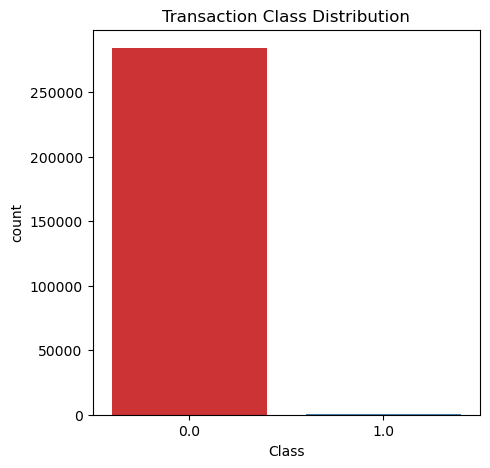

In [53]:
def countplot_data(data,feature):
    plt.figure(figsize = (5,5))
    sns.countplot(x = feature, data = data,palette = "Set1")   # countplot is used to display the count of categorical observations 
    
    plt.title("Transaction Class Distribution")
    plt.show()
def paiplot_data_grid(data,feature1,feature2,target):
    sns.FaceGrid(data,hue = target,height = 6).map(plt.scatter,feature1, feature2).add_legend()
    plt.xticks(range(2),LABELS)
    plt.legend()
    plt.show()
countplot_data(credit_card_data,credit_card_data.Class)

**> Analysis from count plot shows that legit transaction count is extensively high as compared to the fraud transaction.**

Class
0.0    99.827251
1.0     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

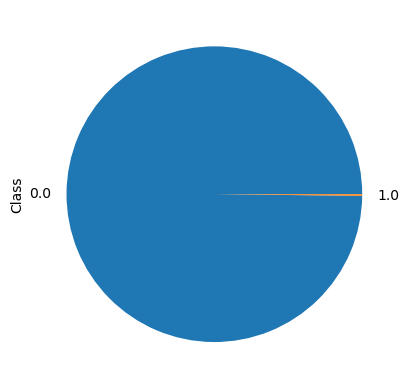

In [54]:
print((credit_card_data.groupby("Class")["Class"].count()/credit_card_data["Class"].count())*100)
((credit_card_data.groupby("Class")["Class"].count()/credit_card_data["Class"].count())*100).plot.pie()

**Analysis from pie chart shows that legit transaction count is extensively high as compared to the fraud transaction.**

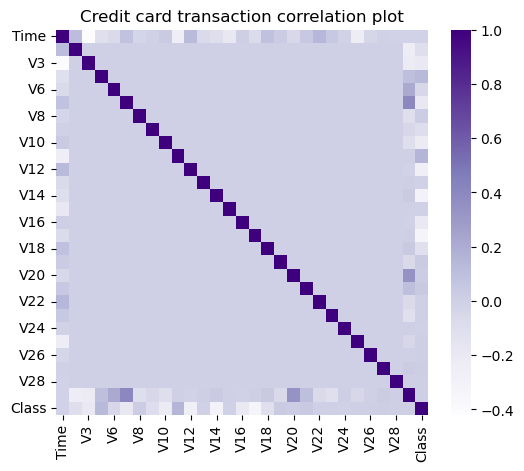

In [55]:
fig = plt.figure(figsize = (6,5))
plt.title("Credit card transaction correlation plot")
corr = credit_card_data.corr()
sns.heatmap(credit_card_data.corr(),cmap = "Purples")
plt.show()

array([[<Axes: xlabel='Amount', ylabel='Amount'>,
        <Axes: xlabel='Class', ylabel='Amount'>,
        <Axes: xlabel='V4', ylabel='Amount'>,
        <Axes: xlabel='V7', ylabel='Amount'>],
       [<Axes: xlabel='Amount', ylabel='Class'>,
        <Axes: xlabel='Class', ylabel='Class'>,
        <Axes: xlabel='V4', ylabel='Class'>,
        <Axes: xlabel='V7', ylabel='Class'>],
       [<Axes: xlabel='Amount', ylabel='V4'>,
        <Axes: xlabel='Class', ylabel='V4'>,
        <Axes: xlabel='V4', ylabel='V4'>,
        <Axes: xlabel='V7', ylabel='V4'>],
       [<Axes: xlabel='Amount', ylabel='V7'>,
        <Axes: xlabel='Class', ylabel='V7'>,
        <Axes: xlabel='V4', ylabel='V7'>,
        <Axes: xlabel='V7', ylabel='V7'>]], dtype=object)

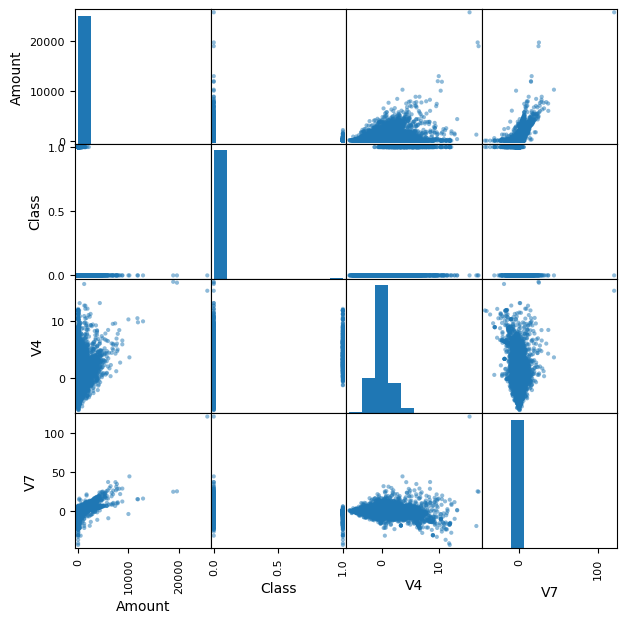

In [56]:
from pandas.plotting import scatter_matrix
attributes = ["Amount","Class","V4","V7"]
scatter_matrix(credit_card_data[attributes],figsize = (7,7))

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

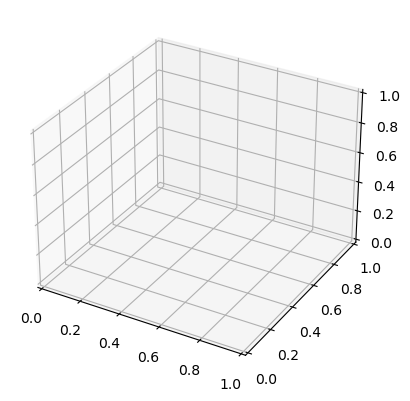

In [57]:
from mpl_toolkits.mplot3d import Axes3D
x = credit_card_data["Time"]
y = credit_card_data["Class"]
z = credit_card_data["V4"]
f = plt.figure()
credit_card_data = f.add_subplot(111,projection = "3d")
credit_card_data.scatter(x,y,z,color = "in")
credit_card_data.set_xlabel("Amount")
credit_card_data.set_ylabel("Class")
credit_card_data.set_zlabel("V4")
plt.show()

**Summary**

**> So this is how Python Programming language can be used to detect the fraud transactions taking place through credit card.**